# Stacked bar charts

Let's visualize majors by race and sex at UNL in R.

So first things first, let's get our two libraries we need.

In [1]:
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Now we grab some [data](https://www.dropbox.com/s/g3sx3pq616qnbvm/collegeenrollment.csv?dl=0). 

In [2]:
enrollment <- read.csv("../../Data/collegeenrollment.csv")

In [3]:
head(enrollment)

College,Degree,MajorCode,MajorName,RaceGender,Race,Gender,Count,Total
College of Agri Sci and Natl Resources,B1BC,BIOC,Biochemistry,NonResidentAlienMale,NonResidentAlien,Male,3,97
College of Agri Sci and Natl Resources,B1AS,ASCI,Animal Science,NonResidentAlienMale,NonResidentAlien,Male,0,338
College of Agri Sci and Natl Resources,B1FW,FWL,Fisheries and Wildlife,NonResidentAlienMale,NonResidentAlien,Male,0,191
College of Agri Sci and Natl Resources,B1AP,APSC,Applied Science,NonResidentAlienMale,NonResidentAlien,Male,1,71
College of Agri Sci and Natl Resources,B1HO,HORT,Horticulture,NonResidentAlienMale,NonResidentAlien,Male,1,52
College of Agri Sci and Natl Resources,B1ED,AEDU,Agricultural Education,NonResidentAlienMale,NonResidentAlien,Male,0,103


So let's narrow our data down a bit. We'll filter our data down to the College of Journalism and Mass Communications, or as the database calls it "& Mass Comm". 

We'll start by creating a new data frame, then use filter(name of source data frame, filter condition). 

In [4]:
cojmc <- filter(enrollment, College == "College of Journalism & Mass Comm")

Now we can visualize it. Let's use a stacked bar chart. The difference between what you have here and what you did in Python is, again, vanishingly small. The major difference -- MAJOR -- is that you no longer put field names in quotes. THAT'S IT! That's all. 

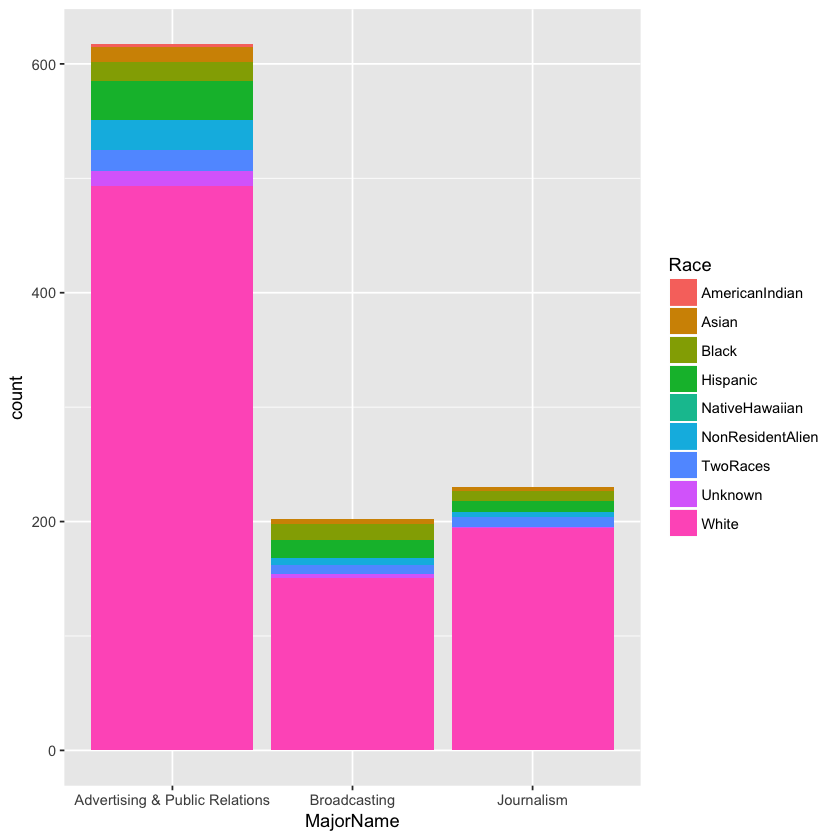

In [5]:
ggplot(cojmc, aes(MajorName, weight=Count, fill=Race)) + geom_bar() + scale_color_brewer("Race")

Let's do the same thing, except for the 10 largest majors on campus. I took a quick look at the data and figured out that the 10 largest majors on campus have more than 500 people in them total. So that's what our filter condition will be. 

In [6]:
largest <- filter(enrollment, Total > 500)

And if we visualize that in the same way, except flipping the bars sideways, this is what we get:

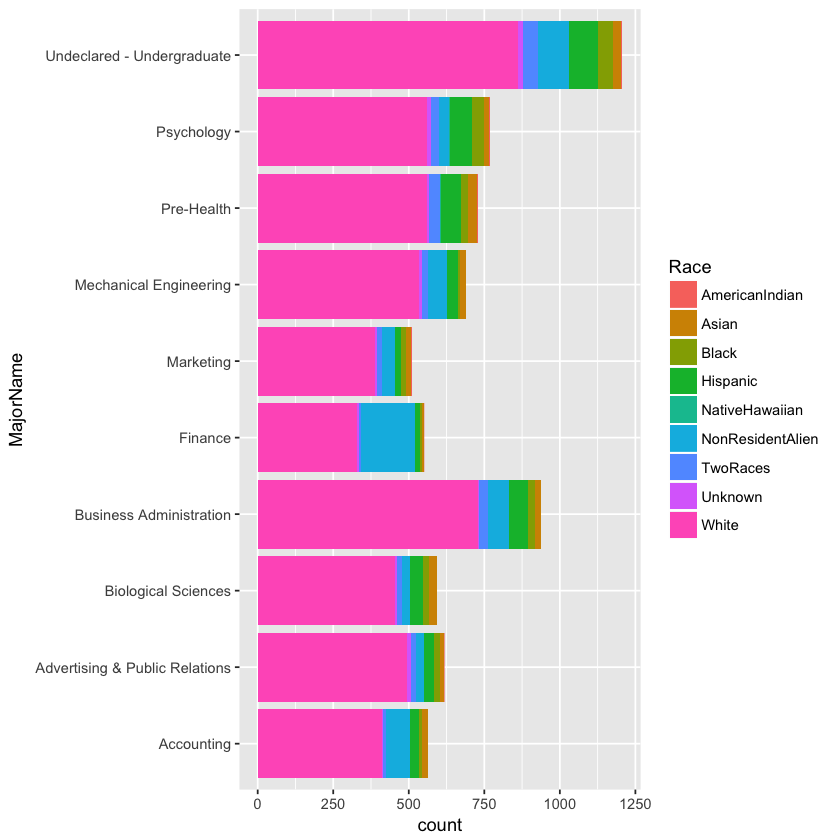

In [7]:
ggplot(largest, aes(MajorName, weight=Count, fill=Race)) + geom_bar() + coord_flip()

If we wanted to map the percentages of the races within each of the 10 largest majors, we could create that column from our existing data. We have the Count and the Total of each Race and Gender Combination, so we can create a new field and calculate that. Whenever we want to change our data frame, we use dplyr's mutate function. You call mutate then the data frame you are mutating, the new field you are creating, and then a formula of some variety to fill it in. 

In [8]:
pctlargest <- mutate(largest, Percent = (Count / Total)*100)

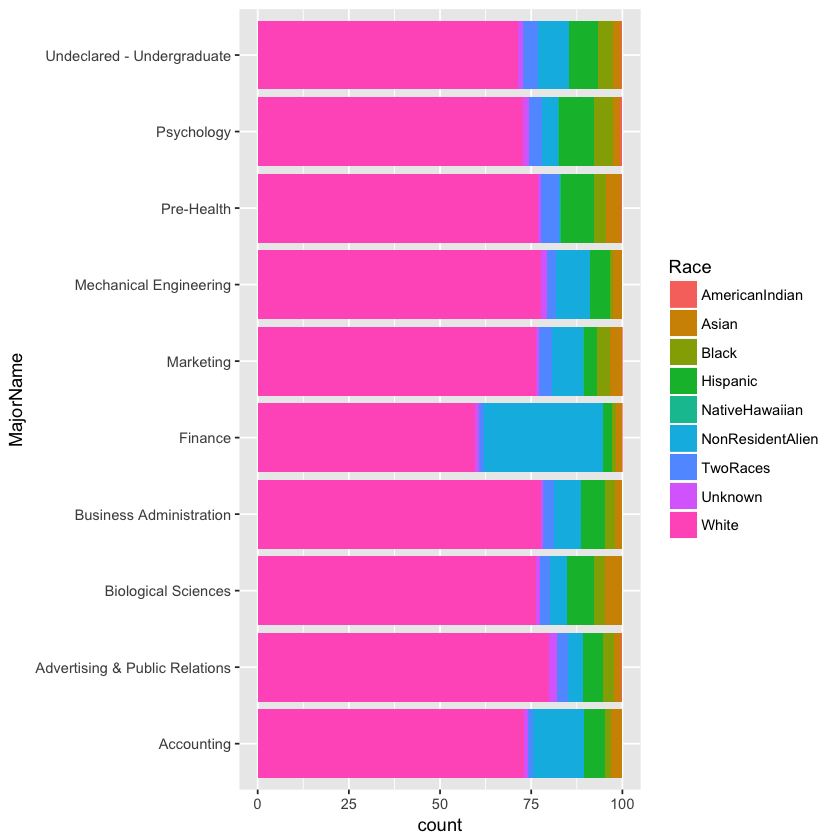

In [11]:
ggplot(pctlargest, aes(MajorName, weight=Percent, fill=Race)) + geom_bar() + coord_flip()

But what if we wanted our bar chart of largest majors to be in order of major? We can use arrage for that. But, there's a bit more magic that has to go on. To make the arrage stick, we have to mutate the data frame and make the order permanent by refactoring the label you'll use.

Here is an example of how to do this. This will also introduce another neat trick in dplyr: The %>%. That allows you to chain commands together, so you don't have to run a new cell every time, or create new data frames every time. So I can create a new data frame, sort it and mutate it all in one go. I can even chart it in the same go if I want.

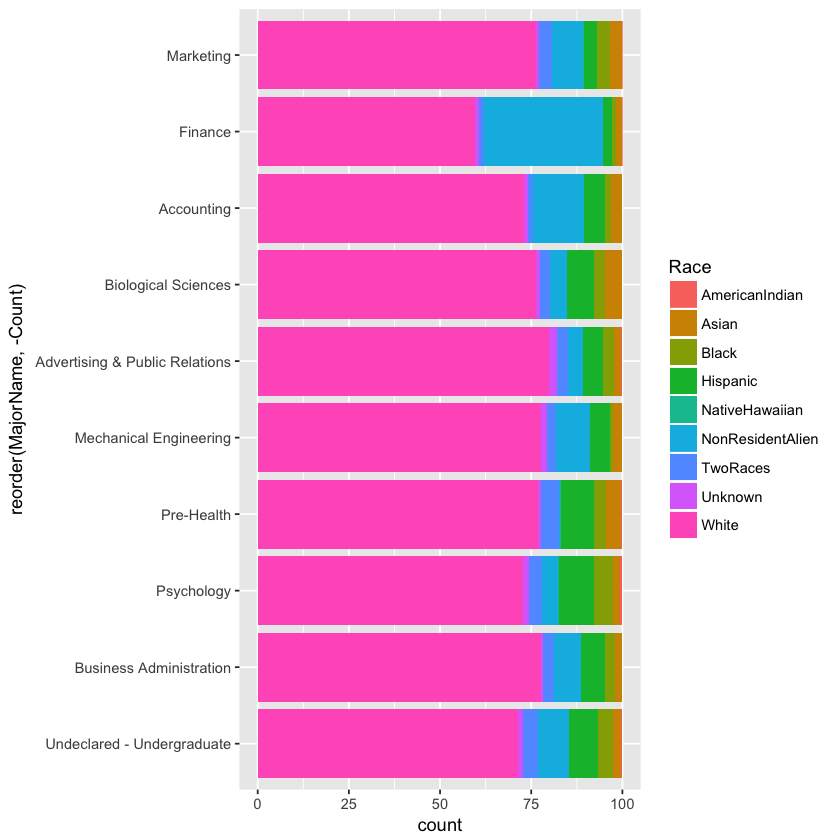

In [16]:
ggplot(pctlargest, aes(reorder(MajorName, -Count), weight=Percent, fill=Race)) + geom_bar() + coord_flip()

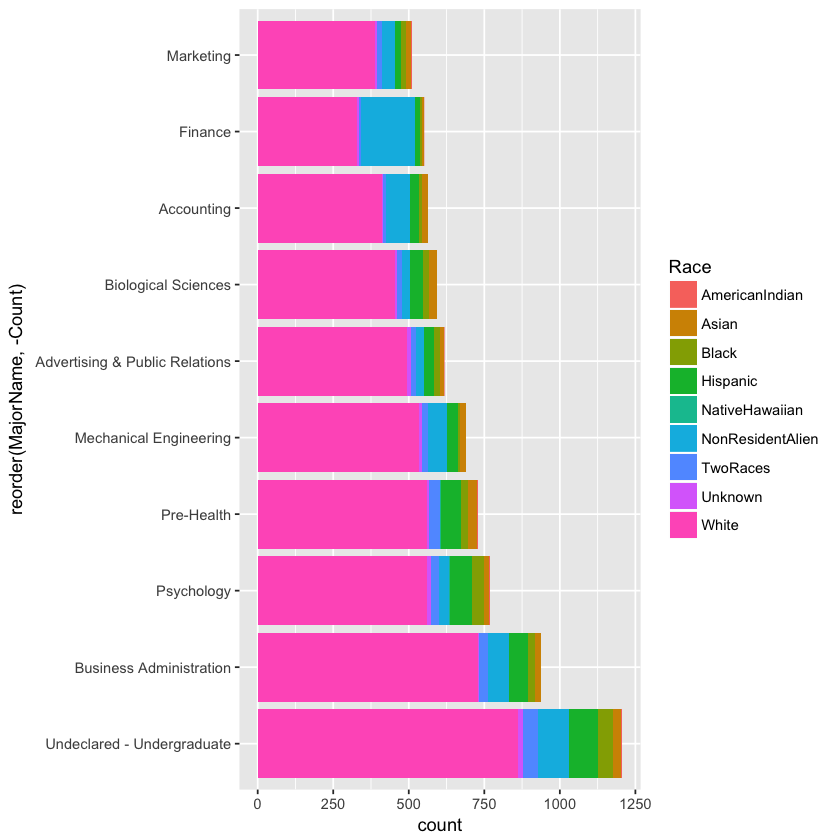

In [18]:
ggplot(largest, aes(reorder(MajorName, -Count), weight=Count, fill=Race)) + geom_bar() + coord_flip()

## Changing the colors

One of the first things you'll notice is that the colors are ... suboptimal. Let's take our first step into changing the look of the default charts. We'll use a library installed called ColorBrewer. [Some help with changing colors can be found here](http://www.sthda.com/english/wiki/ggplot2-colors-how-to-change-colors-automatically-and-manually). 

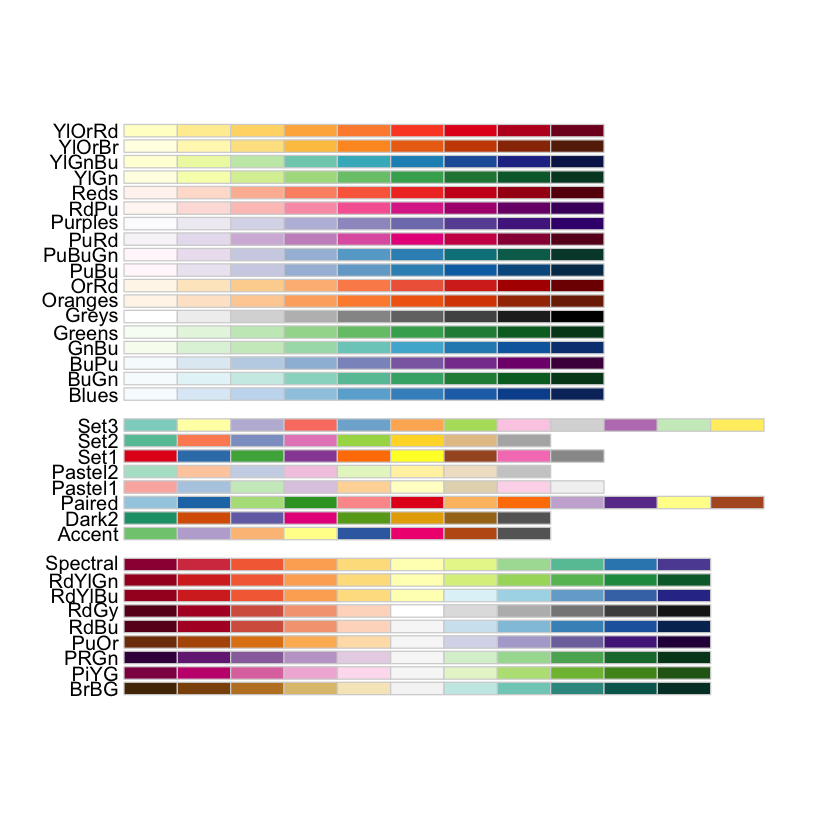

In [20]:
library("RColorBrewer")
display.brewer.all()

So knowing that information above, we can use one of those color ramps to change our colors. We do that by adding `scale_fill_brewer` and the name of the pallete we want to use.

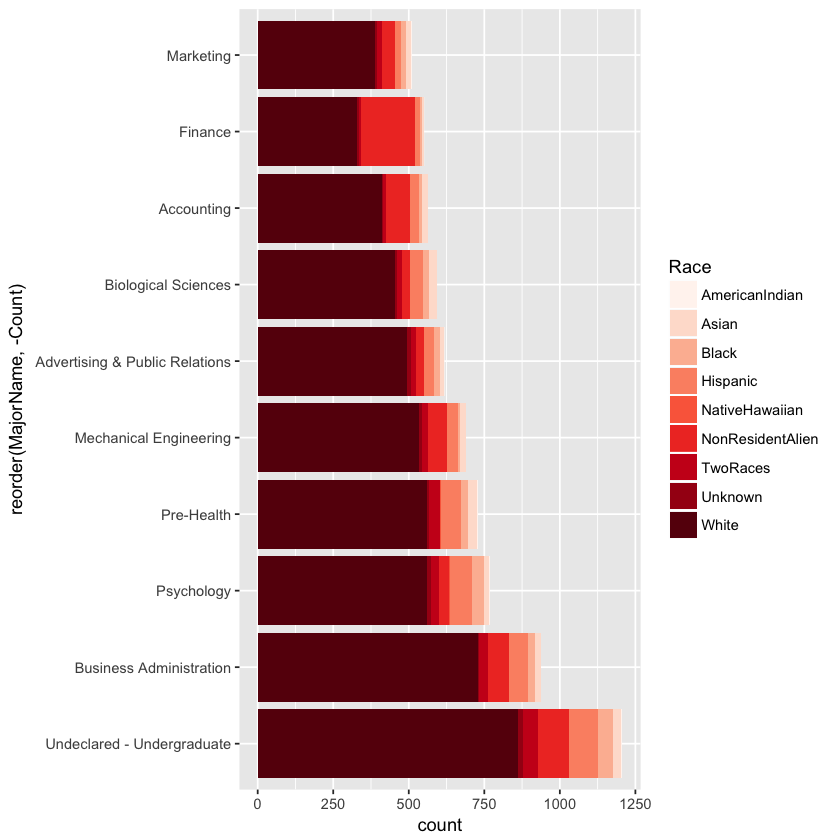

In [24]:
ggplot(largest, aes(reorder(MajorName, -Count), weight=Count, fill=Race)) + geom_bar() + coord_flip() + scale_fill_brewer(palette="Reds")

But how effective is that? Does that help or hurt?

## Assignment

1. Using the chart above, change the color ramp three times, and explain if you think the color ramp chosen is effective or not.
2. Recreate the stacked bar chart by percentage for major by **gender** breakdown instead of race. Create stacked bar charts of the gender breakdown for the largest majors and for College of Journalism and Mass Communications Majors. 
3. Create two different color ramps for your largest majors charts. Discuss how effective the color choices are.

#### Rubric
1. Did you import the data correctly?
2. Did you manipulate the data correctly?
3. Did you chart the data?
4. Did you change the colors correctly and produce the required charts?
5. Did you explain your steps in Markdown comments?
